## Installing Dependencies and Setup

In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached tensorflow_gpu-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
  Using cached matplotlib-3.5.2-cp39-cp39-win_amd64.whl (7.2 MB)


You should consider upgrading via the 'C:\Users\naman\Documents\Data Science\DL Projects\Image Classification\imageclassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.1.0
asttokens                    2.0.5
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.2.0
certifi                      2022.6.15
charset-normalizer           2.1.0
colorama                     0.4.5
cycler                       0.11.0
debugpy                      1.6.2
decorator                    5.1.1
entrypoints                  0.4
executing                    0.8.3
flatbuffers                  1.12
fonttools                    4.34.4
gast                         0.4.0
google-auth                  2.9.1
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.47.0
h5py                         3.7.0
idna                         3.3
importlib-metadata           4.12.0
ipykernel                    6.15.1
ipython                      8.4.0
jedi                         0.18.1
jupyter-c

You should consider upgrading via the 'C:\Users\naman\Documents\Data Science\DL Projects\Image Classification\imageclassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Remove dodgy images

In [4]:
import cv2
import imghdr

In [6]:
data_dir = 'data'

In [7]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

## Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

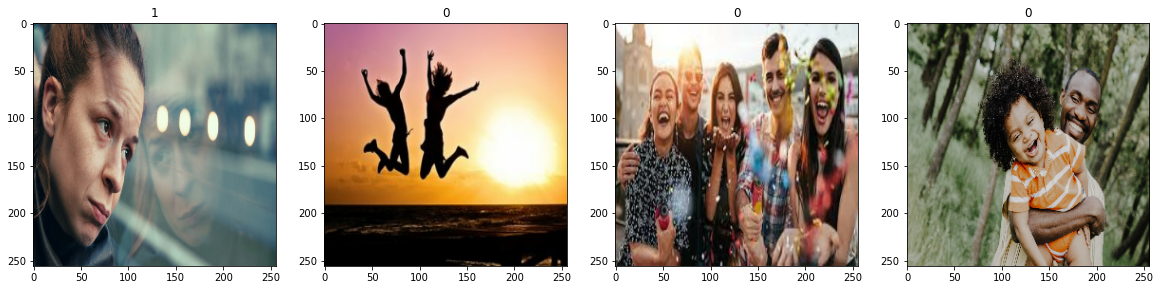

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[7.7254903e-01, 3.3333334e-01, 3.2941177e-01],
          [7.8164828e-01, 3.3535540e-01, 3.2671568e-01],
          [8.2300860e-01, 3.4454656e-01, 3.1446078e-01],
          ...,
          [6.8308824e-01, 6.9840688e-01, 6.8477327e-01],
          [6.9534314e-01, 7.0453429e-01, 6.9243258e-01],
          [6.9803923e-01, 7.0588237e-01, 6.9411767e-01]],
 
         [[7.7524507e-01, 3.2591912e-01, 3.2637867e-01],
          [7.8501046e-01, 3.2889691e-01, 3.2455146e-01],
          [8.2939857e-01, 3.4243235e-01, 3.1624588e-01],
          ...,
          [6.7689568e-01, 6.9271195e-01, 6.8161380e-01],
          [6.8704426e-01, 6.9660139e-01, 6.8716681e-01],
          [6.8927693e-01, 6.9745713e-01, 6.8838847e-01]],
 
         [[7.8750002e-01, 2.9221815e-01, 3.1259191e-01],
          [8.0029321e-01, 2.9954019e-01, 3.1471401e-01],
          [8.5844415e-01, 3.3282232e-01, 3.2435998e-01],
          ...,
          [6.4874768e-01, 6.6682583e-01, 6.6725260e-01],
          [6.4932215e-01, 6.6054279e-

## Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

7

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Build Deep Learning Model

In [21]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Train

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 18s 599ms/step - loss: 1.4468 - accuracy: 0.4330 - val_loss: 0.6530 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 7s 633ms/step - loss: 0.6658 - accuracy: 0.4955 - val_loss: 0.5863 - val_accuracy: 0.5312
Epoch 3/20
7/7 [==============================] - 7s 613ms/step - loss: 0.6547 - accuracy: 0.7009 - val_loss: 0.6462 - val_accuracy: 0.6250
Epoch 4/20
7/7 [==============================] - 7s 601ms/step - loss: 0.5889 - accuracy: 0.6250 - val_loss: 0.5337 - val_accuracy: 0.7812
Epoch 5/20
7/7 [==============================] - 7s 629ms/step - loss: 0.5131 - accuracy: 0.7768 - val_loss: 0.5914 - val_accuracy: 0.6719
Epoch 6/20
7/7 [==============================] - 8s 719ms/step - loss: 0.5709 - accuracy: 0.7366 - val_loss: 0.4667 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 7s 675ms/step - loss: 0.4416 - accuracy: 0.8393 - val_loss: 0.3545 - val_accuracy: 0.8438
Epoch 8/20
7/7 [===

## Plot Performance

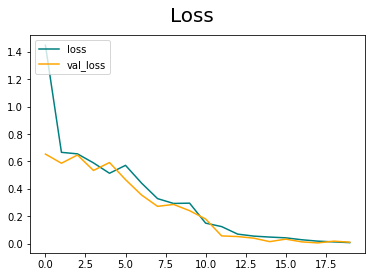

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

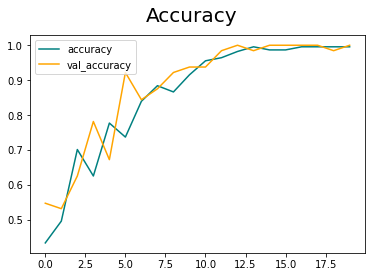

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 739ms/step


In [35]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## Test

In [36]:
import cv2

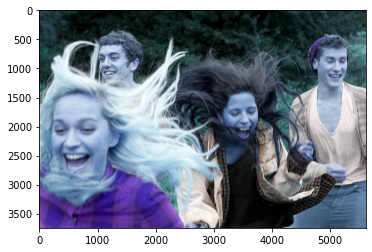

In [37]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

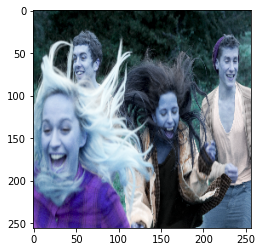

In [38]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [39]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 453ms/step


In [40]:
yhat

array([[0.20626202]], dtype=float32)

In [41]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


## Save the Model

In [42]:
from tensorflow.keras.models import load_model

In [47]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

OSError: No file or directory found at imageclassifier.h5

In [45]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'new_model' is not defined